In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from rtb.datasets import get_dataset
ds = get_dataset(name="rtb-forum", root="../../data/", process=True)

saving table comments...


/dfs/user/kexinh/miniconda3/envs/rtb/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):


done in 0.38 seconds.
saving table badges...
done in 0.07 seconds.
saving table postLinks...
done in 0.03 seconds.
saving table postHistory...
done in 1.13 seconds.
saving table votes...
done in 0.08 seconds.
saving table users...
done in 0.11 seconds.
saving table posts...
done in 0.21 seconds.
loading table ../../data/rtb-forum/processed/db/badges.parquet...
done in 0.03 seconds.
loading table ../../data/rtb-forum/processed/db/comments.parquet...
done in 0.20 seconds.
loading table ../../data/rtb-forum/processed/db/users.parquet...
done in 0.05 seconds.
loading table ../../data/rtb-forum/processed/db/postLinks.parquet...
done in 0.01 seconds.
loading table ../../data/rtb-forum/processed/db/votes.parquet...
done in 0.00 seconds.
loading table ../../data/rtb-forum/processed/db/posts.parquet...
done in 0.11 seconds.
loading table ../../data/rtb-forum/processed/db/postHistory.parquet...
done in 0.78 seconds.


In [3]:
for i,j in ds._db.tables.items():
    print('table', i, ', len: ', str(len(j)))

table badges , len:  79851
table comments , len:  171470
table users , len:  40325
table postLinks , len:  11102
table votes , len:  34789
table posts , len:  15991
table postHistory , len:  281859


In [5]:
task_name = "user_posts_next_three_months"
window_size = ds.tasks_window_size[task_name]
window_size

Timedelta('90 days 00:00:00')

In [6]:
train_table = ds.make_train_table(task_name, window_size)
val_table = ds.make_val_table(task_name, window_size)
test_table = ds.make_test_table(task_name, window_size)

In [7]:
train_table.df

,window_min_time,window_max_time,OwnerUserId,num_posts
0,2010-04-28 14:24:32,2010-07-27 14:24:32,11.0,5
1,2010-04-28 14:24:32,2010-07-27 14:24:32,21.0,1
2,2010-07-27 14:24:32,2010-10-25 14:24:32,44.0,4
3,2010-07-27 14:24:32,2010-10-25 14:24:32,32.0,5
4,2010-07-27 14:24:32,2010-10-25 14:24:32,236.0,4
...,...,...,...,...
2855,2013-04-12 14:24:32,2013-07-11 14:24:32,19776.0,1
2856,2013-04-12 14:24:32,2013-07-11 14:24:32,19795.0,1
2857,2013-04-12 14:24:32,2013-07-11 14:24:32,20030.0,1
2858,2013-04-12 14:24:32,2013-07-11 14:24:32,7078.0,1


In [8]:
ds.train_max_time

Timestamp('2013-09-14 00:00:00')

In [9]:
train_table.df.window_max_time.max()

Timestamp('2013-07-11 14:24:32')

In [10]:
train_table.df.window_min_time.min()

Timestamp('2009-02-02 14:24:32')

In [11]:
val_table.df

,window_min_time,window_max_time,OwnerUserId,num_posts
0,2013-09-14 00:00:01,2013-12-13,5073.0,13
1,2013-09-14 00:00:01,2013-12-13,7537.0,4
2,2013-09-14 00:00:01,2013-12-13,662.0,27
3,2013-09-14 00:00:01,2013-12-13,588.0,124
4,2013-09-14 00:00:01,2013-12-13,7611.0,1
...,...,...,...,...
378,2013-09-14 00:00:01,2013-12-13,567.0,2
379,2013-09-14 00:00:01,2013-12-13,24557.0,1
380,2013-09-14 00:00:01,2013-12-13,22833.0,1
381,2013-09-14 00:00:01,2013-12-13,25181.0,1


In [12]:
val_table.df.window_min_time.min()

Timestamp('2013-09-14 00:00:01')

In [13]:
val_table.df.window_max_time.max()

Timestamp('2013-12-13 00:00:00')

In [14]:
test_table.df

,window_min_time,window_max_time,OwnerUserId
0,2014-03-14 00:00:01,2014-06-12,5265.0
1,2014-03-14 00:00:01,2014-06-12,588.0
2,2014-03-14 00:00:01,2014-06-12,29510.0
3,2014-03-14 00:00:01,2014-06-12,7791.0
4,2014-03-14 00:00:01,2014-06-12,29766.0
...,...,...,...
447,2014-03-14 00:00:01,2014-06-12,702.0
448,2014-03-14 00:00:01,2014-06-12,11878.0
449,2014-03-14 00:00:01,2014-06-12,10776.0
450,2014-03-14 00:00:01,2014-06-12,3524.0


In [15]:
test_table.df.window_min_time.min()

Timestamp('2014-03-14 00:00:01')

In [16]:
test_table.df.window_max_time.max()

Timestamp('2014-06-12 00:00:00')

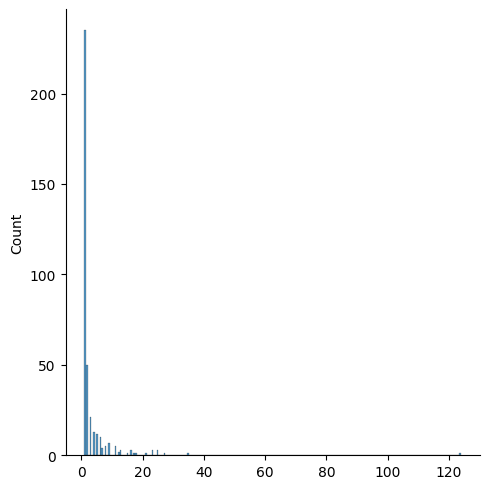

In [18]:
import seaborn as sns
sns.displot(val_table.df.num_posts.values)
## very skewed 

In [19]:
task_name = "comment_scores_next_six_months"
window_size = ds.tasks_window_size[task_name]
window_size

Timedelta('180 days 00:00:00')

In [20]:
train_table = ds.make_train_table(task_name, window_size)
val_table = ds.make_val_table(task_name, window_size)
test_table = ds.make_test_table(task_name, window_size)

In [21]:
train_table.df

,window_min_time,window_max_time,UserId,comment_scores
0,2009-02-02 14:24:32,2009-08-01 14:24:32,3315.0,0.0
1,2010-01-28 14:24:32,2010-07-27 14:24:32,891.0,0.0
2,2010-01-28 14:24:32,2010-07-27 14:24:32,30.0,11.0
3,2010-01-28 14:24:32,2010-07-27 14:24:32,63.0,0.0
4,2010-01-28 14:24:32,2010-07-27 14:24:32,37.0,4.0
...,...,...,...,...
10256,2013-01-12 14:24:32,2013-07-11 14:24:32,1687.0,1.0
10257,2013-01-12 14:24:32,2013-07-11 14:24:32,5843.0,1.0
10258,2013-01-12 14:24:32,2013-07-11 14:24:32,20011.0,0.0
10259,2013-01-12 14:24:32,2013-07-11 14:24:32,16312.0,0.0


/tmp/ipykernel_127302/4026762110.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(val_table.df.comment_scores.values)


<Axes: ylabel='Density'>

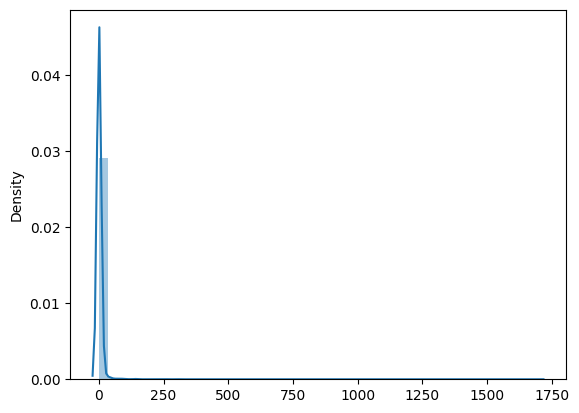

In [24]:
sns.distplot(val_table.df.comment_scores.values)